# ***Reducción de Dimensionalidad Avanzada con t-SNE y UMAP***

Aplicar t-SNE y UMAP para transformar los datos escalados del FIFA 22 a un espacio de 2 dimensiones, con el fin de visualizar estructuras complejas, densidades y posibles agrupamientos que no son detectables con PCA ni métodos lineales. Estas visualizaciones sirven como apoyo para interpretar clustering, detectar grupos naturales y explorar la distribución subyacente de los jugadores.

**Introducción**

Los métodos de reducción de dimensionalidad no lineales como t-SNE y UMAP permiten transformar datos de alta dimensionalidad en representaciones visuales de 2D o 3D, manteniendo estructuras locales o globales según el algoritmo. En este notebook exploraremos ambos métodos y analizaremos qué tan bien reflejan las relaciones entre las instancias del dataset FIFA 22, y cómo estas visualizaciones complementan los resultados de nuestros algoritmos de clustering.

**¿Qué es la reducción de dimensionalidad?**

Es el proceso de convertir datos con muchas características (features) en un número menor de variables, pero manteniendo la mayor parte posible de la estructura original.

**¿Por qué necesitamos reducción de dimensionalidad?**

- los clustering funcionan en alta dimensionalidad

- pero nosotros como humanos no podemos visualizar más de 2D o 3D

- por eso usamos técnicas para “comprimir” los datos en 2D sin perder información importante

Esto NO afecta tus clusters, solo sirve para visualización e interpretación.


**Diferencias entre PCA, t-SNE y UMAP**

1. PCA
- lineal
- conserva variabilidad global
- rápido
-ideal para preprocesar

2. t-SNE (t-distributed Stochastic Neighbor Embedding)

- método no lineal
- preserva relaciones locales
- muy bueno para visualizar “grupitos naturales”
- puede deformar distancias globales
- tarda más tiempo

**Ideal para:**
- Ver si tus clusters se separan bien a nivel local.

3. UMAP (Uniform Manifold Approximation and Projection)

- más moderno
- preserva relaciones locales y globales
- más rápido que t-SNE
- produce separaciones más estables

**Ideal para:** 
Visualizaciones limpias de clusters y estructuras internas.

**¿Esto sirve para los clustering?**

Sí.

t-SNE y UMAP NO mejoran los clustering,
pero sí ayudan a evaluar visualmente si:

- KMeans formó clusters coherentes
- DBSCAN detectó densidades correctamente
- Hierarchical separa los grupos naturales
- GMM captura formas más orgánicas
- existen clusters ocultos, ruido o mezclas

In [35]:
%load_ext kedro.ipython 

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [36]:
catalog.keys()


[
    'DataSetFIFA22',
    'DataSetFIFA21',
    'DataSetFIFA20',
    'preprocess_fifa_21',
    'preprocess_fifa_20',
    'FIFA22_processed_con_transformacion2_columns',
    'FIFA21_processed_con_transformacion2_columnss',
    'FIFA20_processed_con_transformacion2_columns',
    'grid_linear_model',
    'grid_linear_multiple_model',
    'grid_svr_model',
    'grid_decision_tree_model',
    'grid_randomforest_model',
    'grid_logistic_model_classification',
    'grid_knn_model_classification',
    'grind_svc_cv_model_classification',
    'grid_decision_tree_model_classification',
    'grid_random_forest_model_classification',
    'X_train_regression',
    'X_test_regression',
    'y_test_regression',
    'X_train_class',
    'X_test_class',
    'y_train_class',
    'y_test_class',
    'regression_report_linear_simple',
    'regression_report_linear_multiple',
    'regression_report_svr',
    'regression_report_decision_tree',
    'regression_report_randomforest',
    'report_logistic_mo

In [37]:
df_FIFA = catalog.load("model_input_table")
df_fifa_22 = catalog.load("preprocess_fifa_22")

[11/27/25 02:06:14] INFO     Loading data from model_input_table (ParquetDataset)...           ]8;id=329488;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=482247;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from preprocess_fifa_22 (ParquetDataset)...          ]8;id=572704;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=913033;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

#### **Importaciónes**

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

##### **Selección de features**

In [40]:
features = [
    "Age",
    "Overall",
    "Potential",
    "BallControl",
    "Dribbling",
    "Finishing",
    "ShortPassing",
    "Acceleration",
    "SprintSpeed",
    "Agility",
    "Stamina",
    "Strength",
]

X = df_fifa_22[features]

#### **Escalar**

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### *(La creacion de estas seldas demoran mucho)*

##### **t-SNE básico (2D)**

In [42]:
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    max_iter=1000,  
    random_state=42
)

X_tsne = tsne.fit_transform(X_scaled)

X_tsne = tsne.fit_transform(X_scaled)

df_fifa_22["TSNE_1"] = X_tsne[:, 0]
df_fifa_22["TSNE_2"] = X_tsne[:, 1]

**t-SNE básico (2D)**

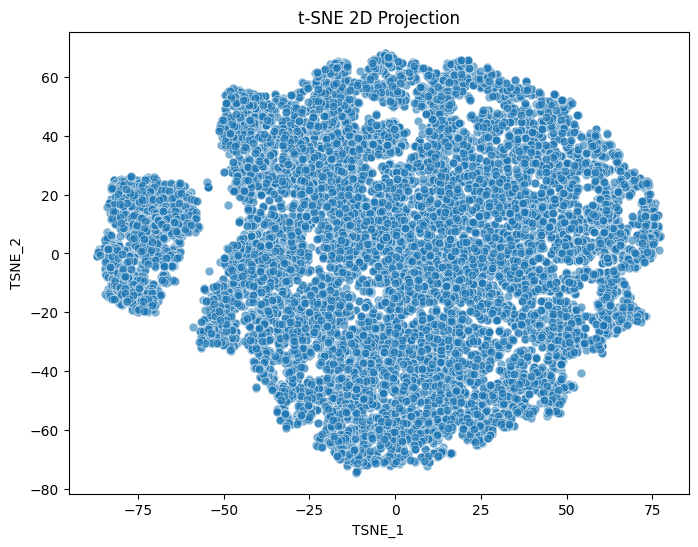

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="TSNE_1", y="TSNE_2", data=df_fifa_22, s=40, alpha=0.6)
plt.title("t-SNE 2D Projection")
plt.show()

#### **t-SNE con diferentes parámetros (Requisito de rúbrica)**

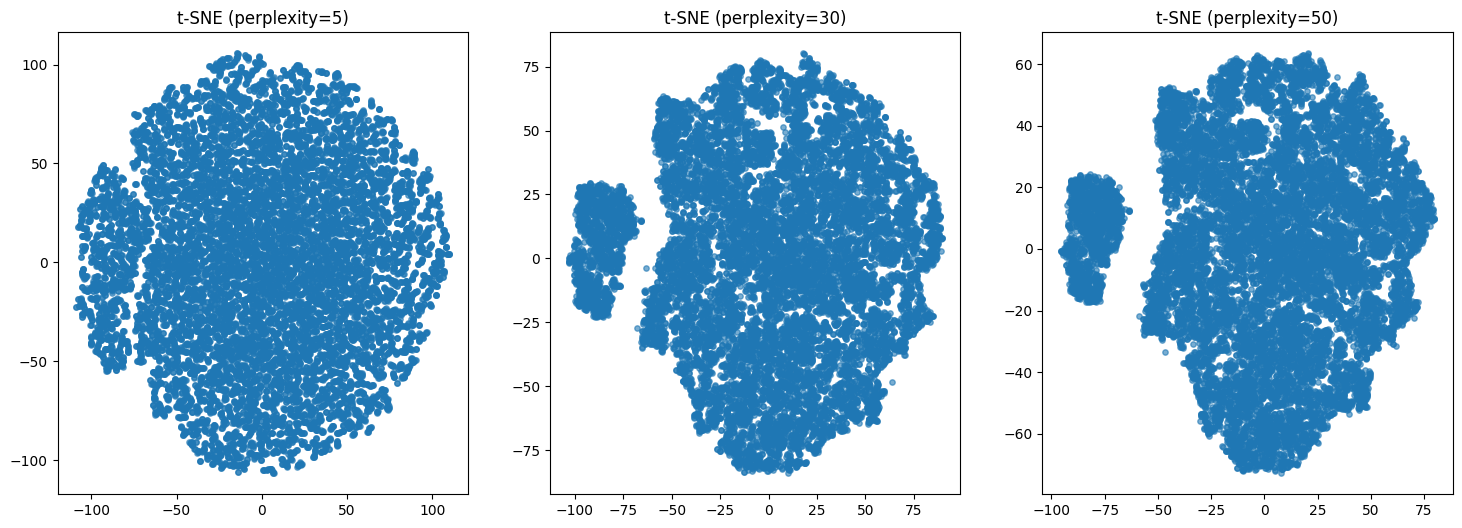

In [45]:
perplexities = [5, 10, 20]

fig, axes = plt.subplots(1, 3, figsize=(18,6))

for i, p in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=p, random_state=42)
    X_emb = tsne.fit_transform(X_scaled)

    axes[i].scatter(X_emb[:,0], X_emb[:,1], s=15, alpha=0.6)
    axes[i].set_title(f"t-SNE (perplexity={p})")

plt.show()


#### **Extra: t-SNE 3D (muy bueno para defensa)**

In [46]:
tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X_scaled)

df_fifa_22["TSNE_3D_1"] = X_tsne_3d[:,0]
df_fifa_22["TSNE_3D_2"] = X_tsne_3d[:,1]
df_fifa_22["TSNE_3D_3"] = X_tsne_3d[:,2]

#### **UMAP básico (2D)**
UMAP es más rápido y genera clusters más definidos.

In [47]:
umap_2d = umap.UMAP(
    n_neighbors=15, 
    min_dist=0.1, 
    n_components=2, 
    random_state=42
)

X_umap = umap_2d.fit_transform(X_scaled)

df_fifa_22["UMAP_1"] = X_umap[:, 0]
df_fifa_22["UMAP_2"] = X_umap[:, 1]


[11/27/25 02:21:24] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\uma warnings.py:110
                             p\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by                       
                             setting random_state. Use no seed for parallelism.                                    
                               warn(                                                                               
                                                                                                                   

#### **Gráfico UMAP 2D**

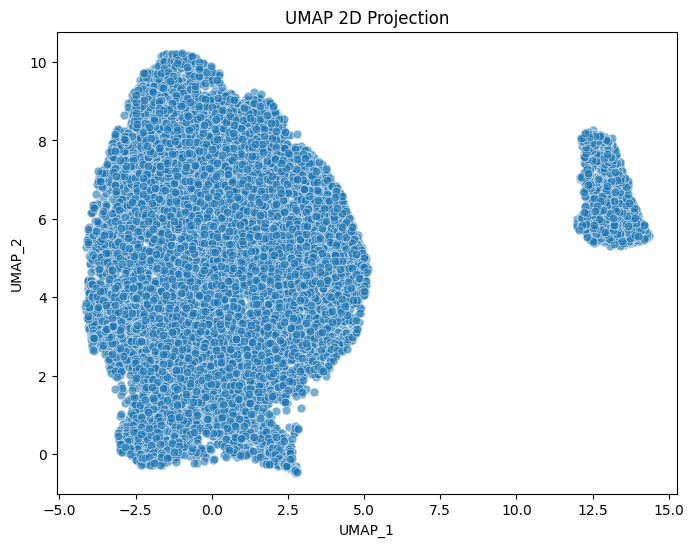

In [48]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="UMAP_1", y="UMAP_2", data=df_fifa_22, s=40, alpha=0.6)
plt.title("UMAP 2D Projection")
plt.show()


#### **UMAP con diferentes parámetros**

[11/27/25 02:25:52] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\uma warnings.py:110
                             p\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by                       
                             setting random_state. Use no seed for parallelism.                                    
                               warn(                                                                               
                                                                                                                   

[11/27/25 02:26:02] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\uma warnings.py:110
                             p\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by                       
                             setting random_state. Use no seed for parallelism.                                    
                               warn(                                                                               
                                                                                                                   

[11/27/25 02:26:13] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\uma warnings.py:110
                             p\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by                       
                             setting random_state. Use no seed for parallelism.                                    
                               warn(                                                                               
                                                                                                                   

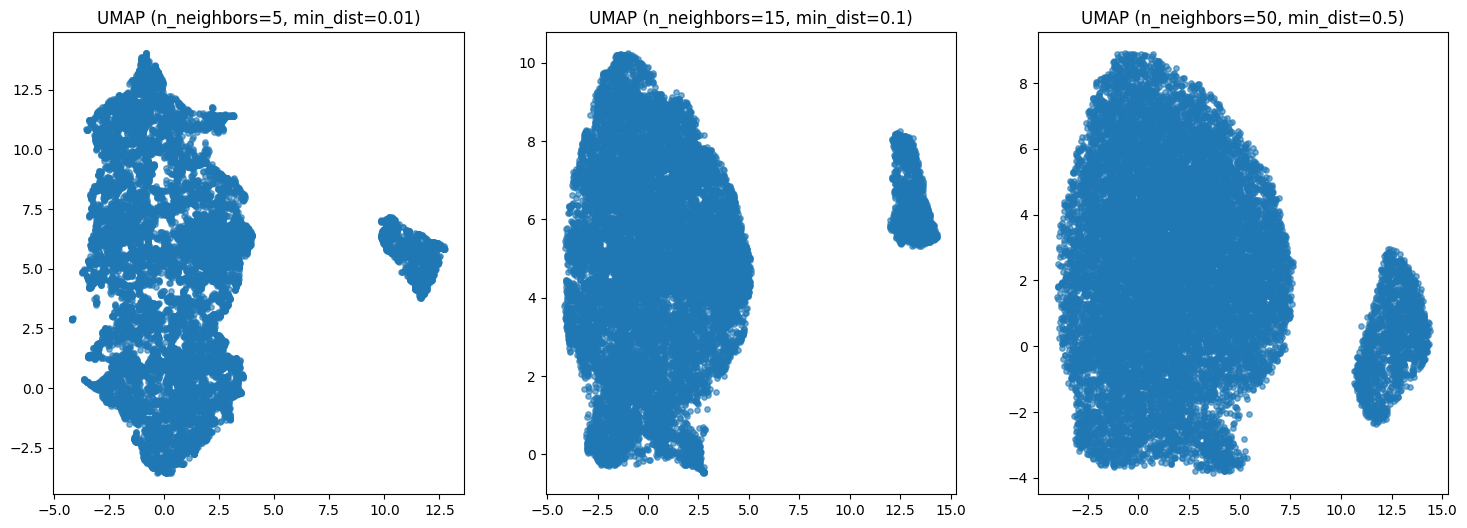

In [49]:
configs = [
    {"n_neighbors": 5,  "min_dist": 0.01},
    {"n_neighbors": 15, "min_dist": 0.1},
    {"n_neighbors": 50, "min_dist": 0.5}
]

fig, axes = plt.subplots(1, 3, figsize=(18,6))

for i, cfg in enumerate(configs):
    reducer = umap.UMAP(
        n_neighbors=cfg["n_neighbors"],
        min_dist=cfg["min_dist"],
        random_state=42
    )
    embedding = reducer.fit_transform(X_scaled)
    
    axes[i].scatter(embedding[:,0], embedding[:,1], s=15, alpha=0.6)
    axes[i].set_title(f"UMAP (n_neighbors={cfg['n_neighbors']}, min_dist={cfg['min_dist']})")

plt.show()


#### **Comparación final t-SNE vs UMAP**

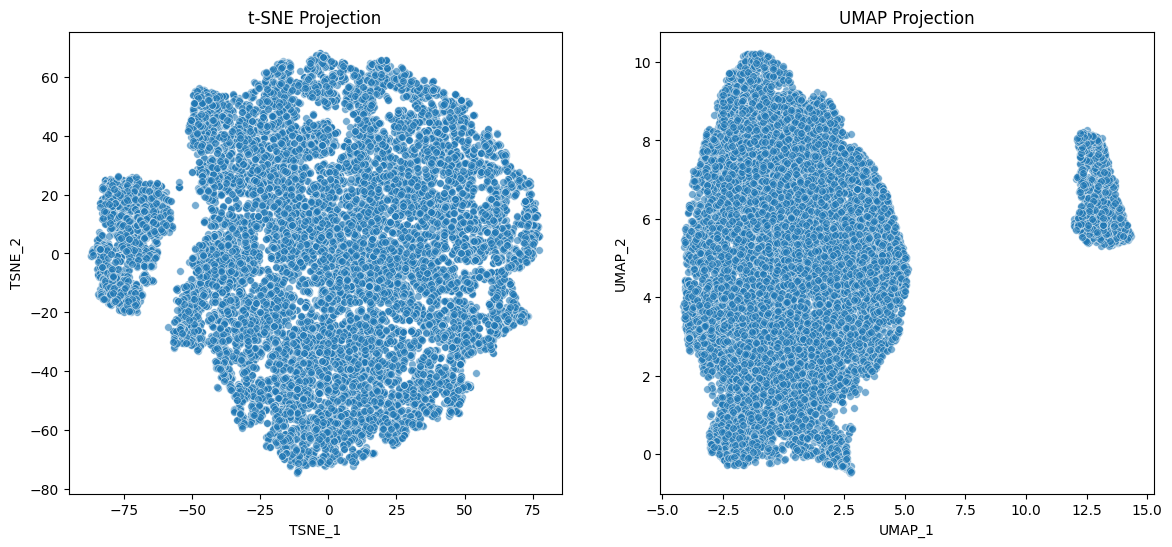

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.scatterplot(ax=axes[0], x="TSNE_1", y="TSNE_2", data=df_fifa_22, s=30, alpha=0.6)
axes[0].set_title("t-SNE Projection")

sns.scatterplot(ax=axes[1], x="UMAP_1", y="UMAP_2", data=df_fifa_22, s=30, alpha=0.6)
axes[1].set_title("UMAP Projection")

plt.show()


#### **(Bonus fuerte) Visualizar clusters sobre t-SNE / UMAP**

Ejemplo con KMeans:

In [52]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df_fifa_22["TSNE_1"], y=df_fifa_22["TSNE_2"], 
    hue=df_fifa_22["KMeans_cluster"], palette="tab10", s=40
)
plt.title("KMeans Clusters sobre t-SNE")
plt.show()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\pandas\core\indexes\base.py:3 │
│ 805 in get_loc                                                                                   │
│                                                                                                  │
│   3802 │   │   """                                                                               │
│   3803 │   │   casted_key = self._maybe_cast_indexer(key)                                        │
│   3804 │   │   try:                                                                              │
│ ❱ 3805 │   │   │   return self._engine.get_loc(casted_key)                                       │
│   3806 │   │   except KeyError as err:                                                           │
│   3807 │   │   │   if isinstance(casted_key, slice) or (                                         │
│   3808 │   │   │   │   isinstance(casted_key, abc.Iterable)                                      │
│                                                                                                  │
│ in pandas._libs.index.IndexEngine.get_loc:167                                                    │
│                                                                                                  │
│ in pandas._libs.index.IndexEngine.get_loc:196                                                    │
│                                                                                                  │
│ in pandas._libs.hashtable.PyObjectHashTable.get_item:7081                                        │
│                                                                                                  │
│ in pandas._libs.hashtable.PyObjectHashTable.get_item:7089                                        │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'KMeans_cluster'

The above exception was the direct cause of the following exception:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:4                                                                                    │
│                                                                                                  │
│   1 plt.figure(figsize=(8,6))                                                                    │
│   2 sns.scatterplot(                                                                             │
│   3 │   x=df_fifa_22["TSNE_1"], y=df_fifa_22["TSNE_2"],                                          │
│ ❱ 4 │   hue=df_fifa_22["KMeans_cluster"], palette="tab10", s=40                                  │
│   5 )                                                                                            │
│   6 plt.title("KMeans Clusters sobre t-SNE")                                                     │
│   7 plt.show()                                                                                   │
│                                                                                                  │
│ C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\pandas\core\frame.py:4102 in  │
│ __getitem__                                                                                      │
│                                                                                                  │
│    4099 │   │   if is_single_key:                                                                │
│    4100 │   │   │   if self.columns.nlevels > 1:                                                 │
│    4101 │   │   │   │   return self._getitem_multilevel(key)                                     │
│ ❱  4102 │   │   │   indexer = self.columns.get_loc(key)                                          │
│    4103 │   │   │   if is_integer(indexer):                   

<Figure size 800x600 with 0 Axes>

Y para UMAP:

In [53]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df_fifa_22["UMAP_1"], y=df_fifa_22["UMAP_2"], 
    hue=df_fifa_22["GMM_cluster"], palette="tab10", s=40
)
plt.title("GMM Clusters sobre UMAP")
plt.show()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\pandas\core\indexes\base.py:3 │
│ 805 in get_loc                                                                                   │
│                                                                                                  │
│   3802 │   │   """                                                                               │
│   3803 │   │   casted_key = self._maybe_cast_indexer(key)                                        │
│   3804 │   │   try:                                                                              │
│ ❱ 3805 │   │   │   return self._engine.get_loc(casted_key)                                       │
│   3806 │   │   except KeyError as err:                                                           │
│   3807 │   │   │   if isinstance(casted_key, slice) or (                                         │
│   3808 │   │   │   │   isinstance(casted_key, abc.Iterable)                                      │
│                                                                                                  │
│ in pandas._libs.index.IndexEngine.get_loc:167                                                    │
│                                                                                                  │
│ in pandas._libs.index.IndexEngine.get_loc:196                                                    │
│                                                                                                  │
│ in pandas._libs.hashtable.PyObjectHashTable.get_item:7081                                        │
│                                                                                                  │
│ in pandas._libs.hashtable.PyObjectHashTable.get_item:7089                                        │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'GMM_cluster'

The above exception was the direct cause of the following exception:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:4                                                                                    │
│                                                                                                  │
│   1 plt.figure(figsize=(8,6))                                                                    │
│   2 sns.scatterplot(                                                                             │
│   3 │   x=df_fifa_22["UMAP_1"], y=df_fifa_22["UMAP_2"],                                          │
│ ❱ 4 │   hue=df_fifa_22["GMM_cluster"], palette="tab10", s=40                                     │
│   5 )                                                                                            │
│   6 plt.title("GMM Clusters sobre UMAP")                                                         │
│   7 plt.show()                                                                                   │
│                                                                                                  │
│ C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\pandas\core\frame.py:4102 in  │
│ __getitem__                                                                                      │
│                                                                                                  │
│    4099 │   │   if is_single_key:                                                                │
│    4100 │   │   │   if self.columns.nlevels > 1:                                                 │
│    4101 │   │   │   │   return self._getitem_multilevel(key)                                     │
│ ❱  4102 │   │   │   indexer = self.columns.get_loc(key)                                          │
│    4103 │   │   │   if is_integer(indexer):                      

<Figure size 800x600 with 0 Axes>